<a href="https://colab.research.google.com/github/sammy-suyama/PythonBayesianMLBook/blob/main/chapter5/5_1_%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title install packages
!pip install watermark
!pip install japanize-matplotlib
# !pip install torch==1.10.0

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

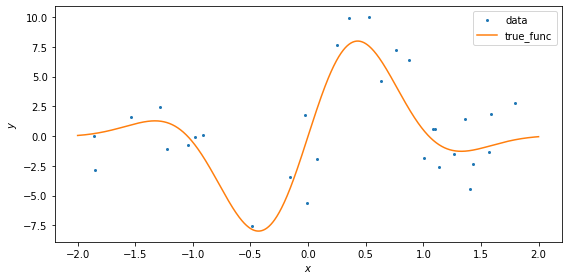

In [ ]:
np.random.seed(20)

# データ数
N = 30

# 目的変数生成関数
def make_data(x, eps):
  y = 10*np.sin(3*x) * np.exp(-x**2)
  noise = np.random.normal(0, eps, size=x.shape[0])
  return y+ noise

# 説明変数をサンプリング
x_data = np.random.uniform(low=-2., high=2., size=N)
# 目的変数生成
y_data =  make_data(x_data, 2.0)
# 関数可視化用説明変数
x_linspace = np.linspace(-2., 2., 1000)
# 関数可視化用目的変数
y_linspace = make_data(x_linspace, 0.0)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_data, y_data, 'o', markersize=2, label='data');
ax.plot(x_linspace, y_linspace, label='true_func')
ax.set_xlabel('$x$');ax.set_ylabel('$y$')
ax.legend()
plt.tight_layout();

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(0)
#import random
#random.seed(0)

# 隠れ層の次元を設定
h1, h2 = 10,  10

class NN_Model(nn.Module):
    # 各層のコンポーネントを定義
    def __init__(self, h1=h1, h2=h2):
        super(NN_Model, self).__init__()
        self.fc1 = nn.Linear(1, h1) 
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, 1)
        self.relu = F.relu
    # 生成過程
    def forward(self, x):
        x = x.reshape(-1, 1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        y = self.fc3(x)
        return y

# インスタンス化
model_torch = NN_Model()

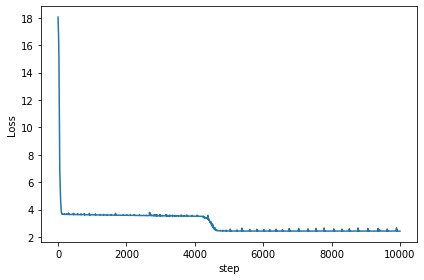

In [ ]:
# optimizerの設定
optimizer = torch.optim.Adam(model_torch.parameters(), lr=0.03)

# 損失関数
loss_func = nn.MSELoss()

# tensorに変換（shapeを（N,）から（N,1）にする）
x_data = torch.from_numpy(x_data).float().unsqueeze(-1)
y_data = torch.from_numpy(y_data).float().unsqueeze(-1)

# 最適化
n_epoch = 10000
loss_list = []
for epoch in range(n_epoch):
    # 今のパラメータによるモデルで予測値を算出
    pred = model_torch(x_data)
    # 損失関数を再計算
    loss = loss_func(pred, y_data)
    # 勾配を0に初期化
    optimizer.zero_grad()
    # 誤差逆伝播
    loss.backward()
    # パラメータ更新
    optimizer.step()

    #loss_list.append(loss)
    loss_list.append(loss.detach().numpy())
    
# 損失関数の可視化
plt.plot(np.array(loss_list))
plt.xlabel('step')
plt.ylabel('Loss')
plt.tight_layout();

In [ ]:
###Pytorch############################################################
x_new = torch.linspace(-2.0, 2.0, 1000).unsqueeze(-1)
pred_torch = model_torch(x_new)
###############################################################

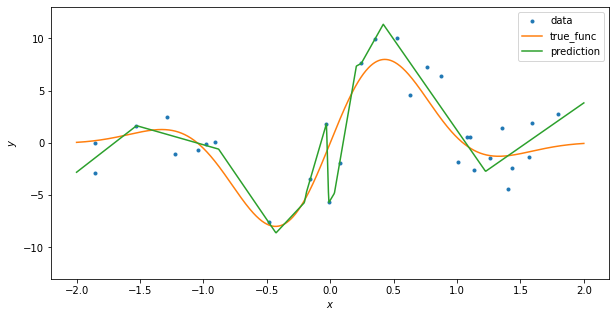

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
# データ可視化
ax.plot(x_data, y_data, 'o', markersize=3, label='data')
# 真の関数可視化
ax.plot(x_linspace, y_linspace, label='true_func')
# 予測値可視化
ax.plot(x_new, pred_torch.detach().numpy(), label='prediction')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-13 ,13)
ax.legend();

In [ ]:
%load_ext watermark
%watermark --iversions

seaborn   : 0.11.2
scipy     : 1.4.1
IPython   : 5.5.0
pandas    : 1.3.5
numpy     : 1.21.6
torch     : 1.11.0+cu113
matplotlib: 3.2.2
arviz     : 0.12.1

